# Importing librarys

In [1]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

## Download the data

In [ ]:
jnj_long_data = yf.download("JNJ", period="max", interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
jnj_long_data.head()

Price,Close,High,Low,Open,Volume
Ticker,JNJ,JNJ,JNJ,JNJ,JNJ
Date,,,,,
1962-01-02,0.062519,0.062519,0.062195,0.0,0
1962-01-03,0.061547,0.061871,0.061547,0.0,345600
1962-01-04,0.060899,0.061871,0.060899,0.0,216000
1962-01-05,0.059927,0.060413,0.059927,0.0,129600
1962-01-08,0.058956,0.059441,0.058956,0.0,172800


In [ ]:
# rename the columns
jnj_long_data.columns = ["Close", "High", "Low", "Open", "Volume"]

In [ ]:
jnj_long_data.head()

,Close,High,Low,Open,Volume
Date,,,,,
1962-01-02,0.062519,0.062519,0.062195,0.0,0
1962-01-03,0.061547,0.061871,0.061547,0.0,345600
1962-01-04,0.060899,0.061871,0.060899,0.0,216000
1962-01-05,0.059927,0.060413,0.059927,0.0,129600
1962-01-08,0.058956,0.059441,0.058956,0.0,172800


In [ ]:
# check for the missing values
jnj_long_data.isnull().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0


In [ ]:
# download the data
jnj_long_data.to_csv("jnj_long_data.csv")

## Loading the data

In [2]:
jnj_long_data = pd.read_csv("jnj_long_data.csv")

#Exploratory Analysis

In [3]:
jnj_long_data.head()

,Date,Close,High,Low,Open,Volume
0,1962-01-02,0.062519,0.062519,0.062195,0.0,0
1,1962-01-03,0.061547,0.061871,0.061547,0.0,345600
2,1962-01-04,0.060899,0.061871,0.060899,0.0,216000
3,1962-01-05,0.059927,0.060413,0.059927,0.0,129600
4,1962-01-08,0.058956,0.059441,0.058956,0.0,172800


In [4]:
jnj_long_data.shape

(15875, 6)

## Univariate Analysis

In [5]:
jnj_long_data.describe()

,Close,High,Low,Open,Volume
count,15875.000000,15875.000000,15875.000000,15875.000000,1.587500e+04
mean,31.352181,31.577414,31.110712,31.331819,5.680771e+06
std,45.433318,45.746614,45.099814,45.439884,5.398511e+06
min,0.040191,0.041498,0.040191,0.000000,0.000000e+00
25%,0.610747,0.615088,0.606341,0.611229,1.769600e+06
50%,5.412176,5.459565,5.351506,5.419350,5.048000e+06
75%,39.480280,39.742966,39.158193,39.456434,7.846350e+06
max,171.606262,172.233614,169.917960,170.766732,1.513195e+08


In [6]:
jnj_long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15875 entries, 0 to 15874
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    15875 non-null  object 
 1   Close   15875 non-null  float64
 2   High    15875 non-null  float64
 3   Low     15875 non-null  float64
 4   Open    15875 non-null  float64
 5   Volume  15875 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 744.3+ KB


In [7]:
# change the Date data type
jnj_long_data['Date'] = pd.to_datetime(jnj_long_data['Date'])

In [8]:
# skewness and kurtosis
print("Skewness:", jnj_long_data.select_dtypes(include=np.number).skew())
print("Kurtosis:", jnj_long_data.select_dtypes(include=np.number).kurtosis())

Skewness: Close     1.610396
High      1.610806
Low       1.610077
Open      1.609839
Volume    5.673402
dtype: float64
Kurtosis: Close      1.464988
High       1.466826
Low        1.463129
Open       1.463194
Volume    97.728711
dtype: float64


# Distribution Analysis

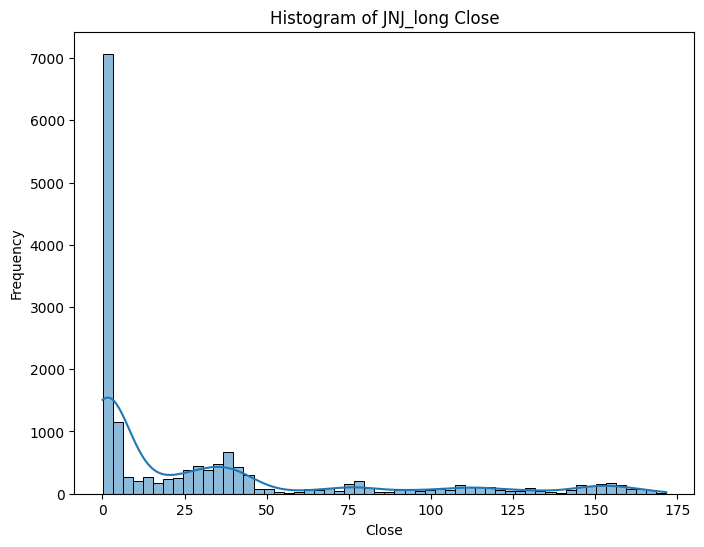

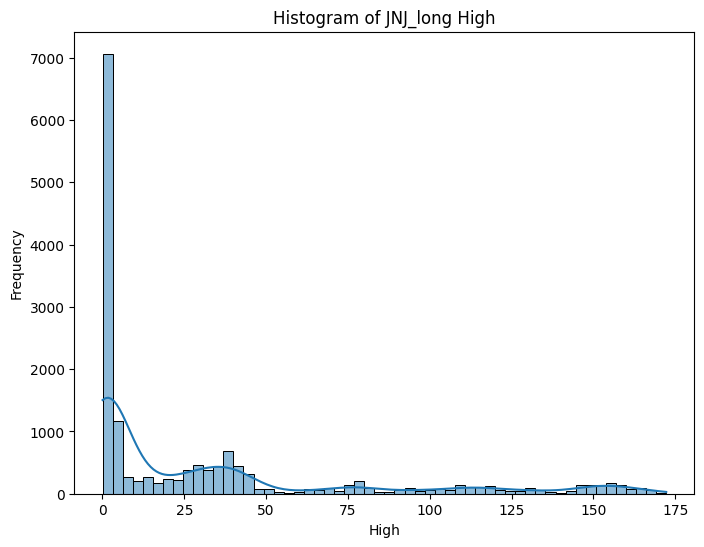

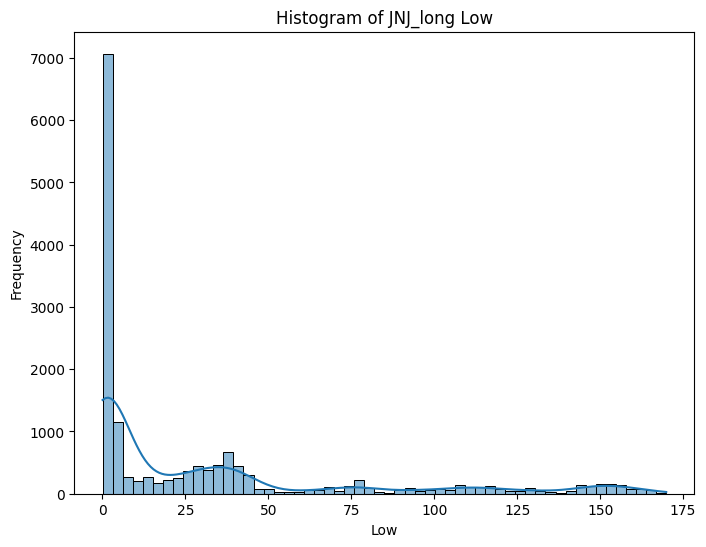

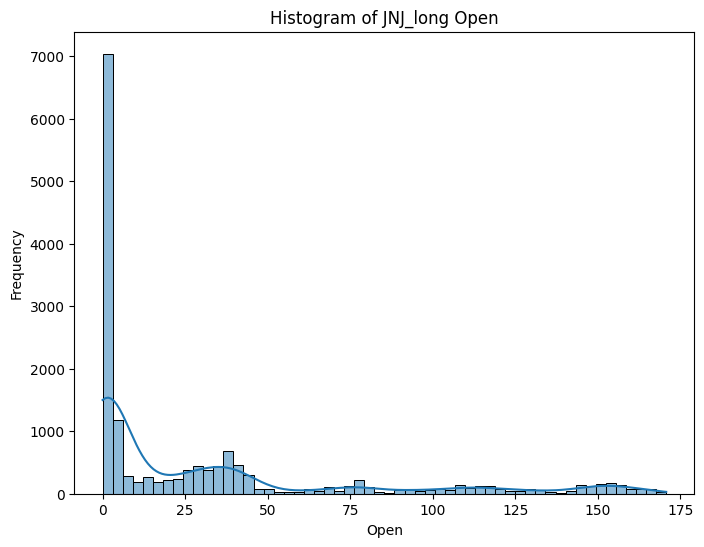

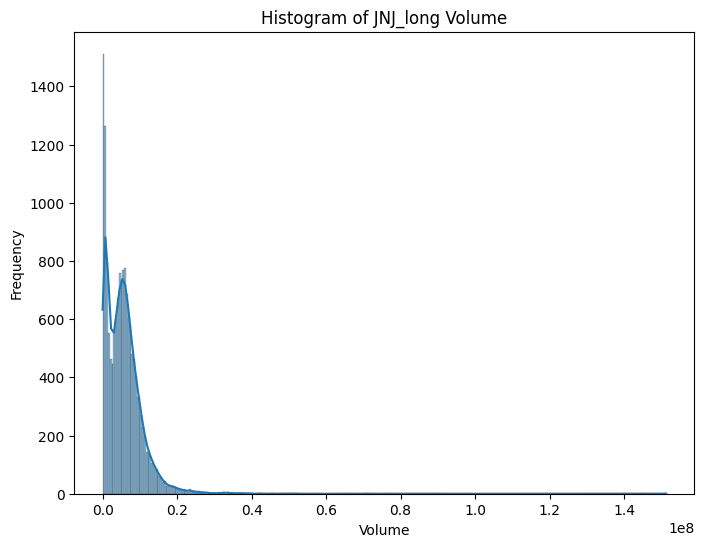

In [9]:
# Identify numerical columns
numerical_columns = jnj_long_data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    # For continuous variables
    if len(jnj_long_data[column].unique()) > 10:
        plt.figure(figsize=(8, 6))
        sns.histplot(jnj_long_data[column], kde=True)
        plt.title(f'Histogram of JNJ_long {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

## Trend Analysis

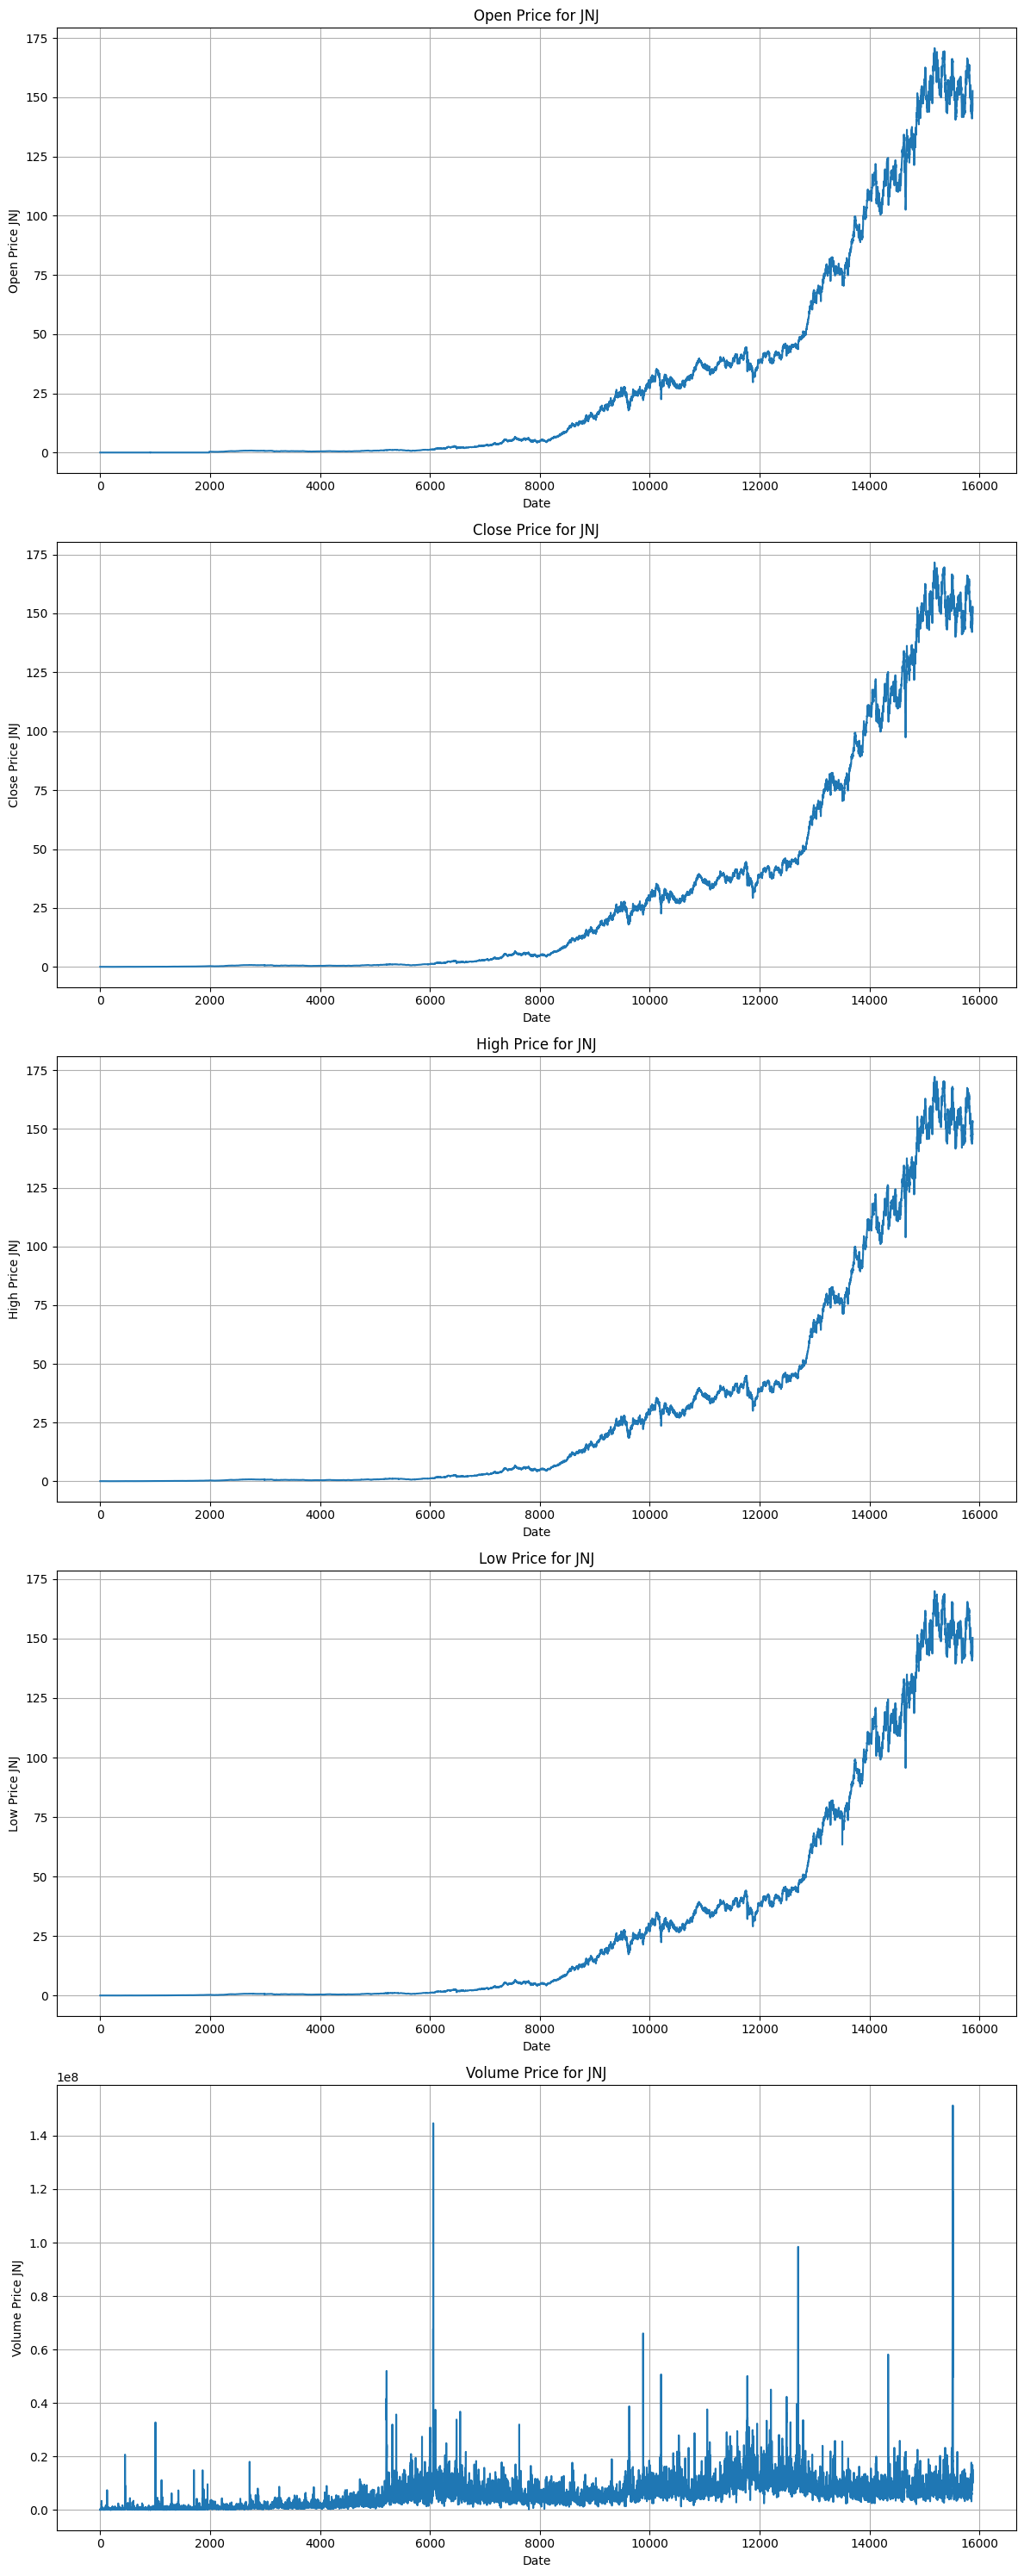

In [10]:
# List of columns to plot
columns = ['Open', 'Close', 'High', 'Low', 'Volume']

# Create subplots
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 6 * len(columns)))

# Loop through each column and plot
for i, col in enumerate(columns):
    axes[i].plot(jnj_long_data.index, jnj_long_data[col])
    axes[i].set_title(f'{col} Price for JNJ')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(f'{col} Price JNJ')
    axes[i].grid(True)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

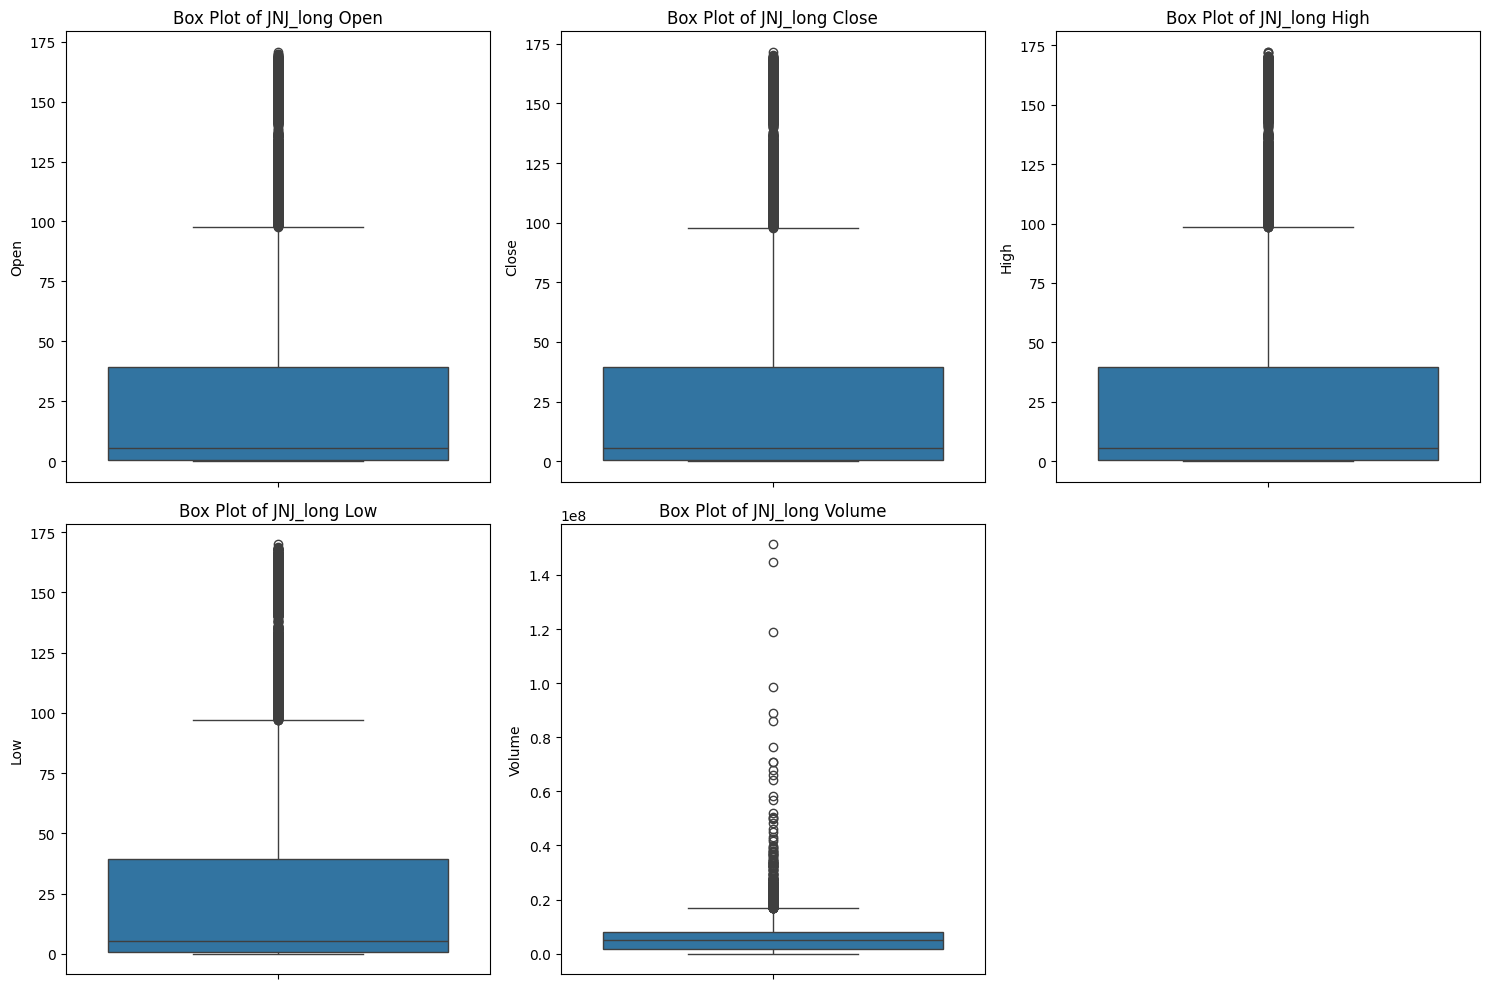

In [12]:
columns = ['Open', 'Close', 'High', 'Low', 'Volume']  # Columns to check

plt.figure(figsize=(15, 10))  # Adjust figure size as needed

for i, col in enumerate(columns):
    plt.subplot(2, 3, i + 1)  # Create subplots for each column
    sns.boxplot(y=jnj_long_data[col])
    plt.title(f'Box Plot of JNJ_long {col}')

plt.tight_layout()
plt.show()

## Bivariate Analysis

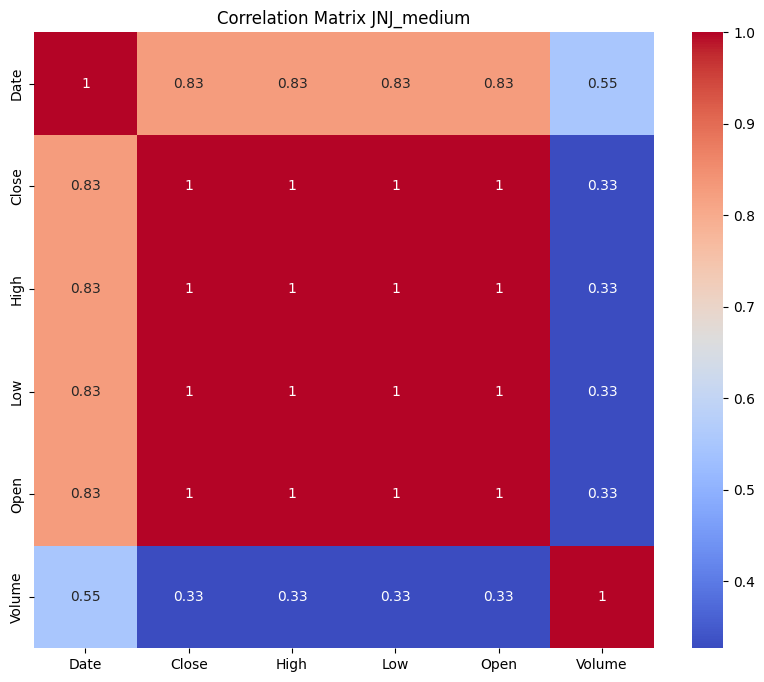

In [13]:
correlation_matrix = jnj_long_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix JNJ_medium')
plt.show()

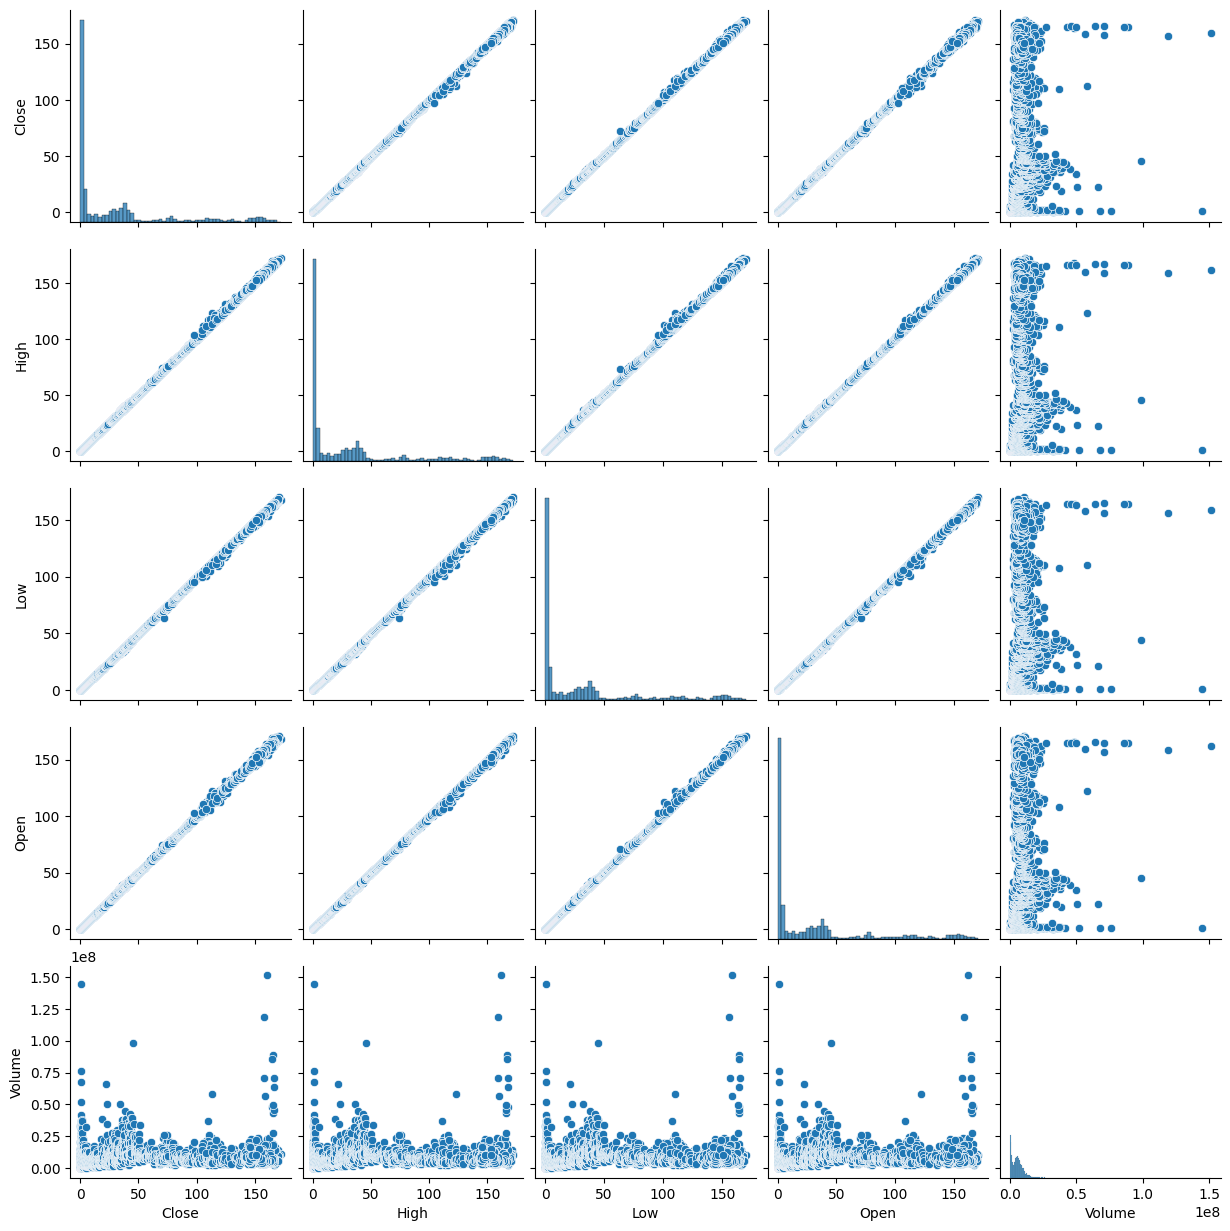

In [14]:
# pairs of numerical columns
sns.pairplot(jnj_long_data.select_dtypes(include=np.number))
plt.show()

Text(0.5, 1.0, 'JNJ_long Relationship between Close Price and Trading Volume')

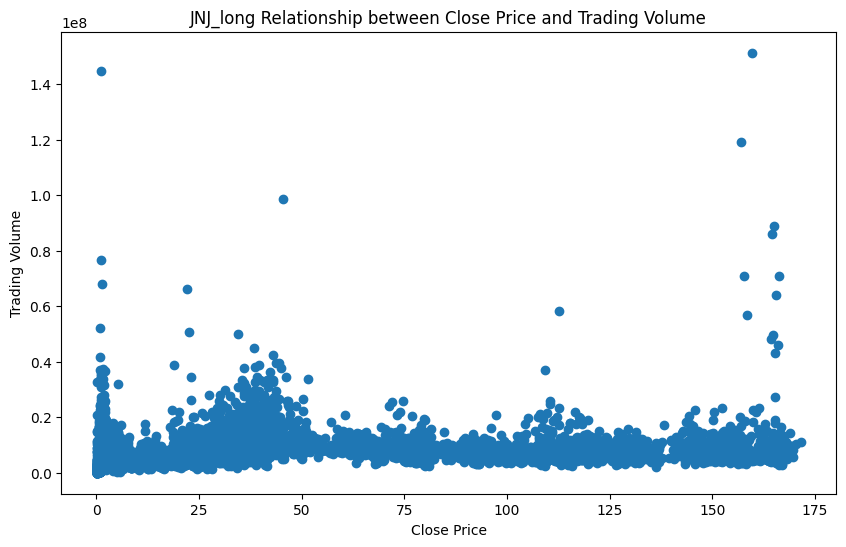

In [15]:
# relationship between price and trading volume
plt.figure(figsize=(10, 6))
plt.scatter(jnj_long_data['Close'], jnj_long_data['Volume'])
plt.xlabel('Close Price')
plt.ylabel('Trading Volume')
plt.title('JNJ_long Relationship between Close Price and Trading Volume')

# Feature Engineering

In [16]:
# Moving Average (SMA) with a 365-day window
window_sma = 365
jnj_long_data['SMA'] = jnj_long_data['Close'].rolling(window=window_sma).mean()

# Bollinger Bands with a 365-day window
jnj_long_data['StdDev'] = jnj_long_data['Close'].rolling(window=window_sma).std()
jnj_long_data['UpperBand'] = jnj_long_data['SMA'] + (2 * jnj_long_data['StdDev'])
jnj_long_data['LowerBand'] = jnj_long_data['SMA'] - (2 * jnj_long_data['StdDev'])

# RSI with a 60-day window
def calculate_rsi(data, window=60):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

jnj_long_data['RSI'] = calculate_rsi(jnj_long_data)

In [17]:
jnj_long_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,364
StdDev,364
UpperBand,364
LowerBand,364


In [18]:
# FILL NA with mean
jnj_long_data.fillna(jnj_long_data.mean(), inplace=True)

In [19]:
jnj_long_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


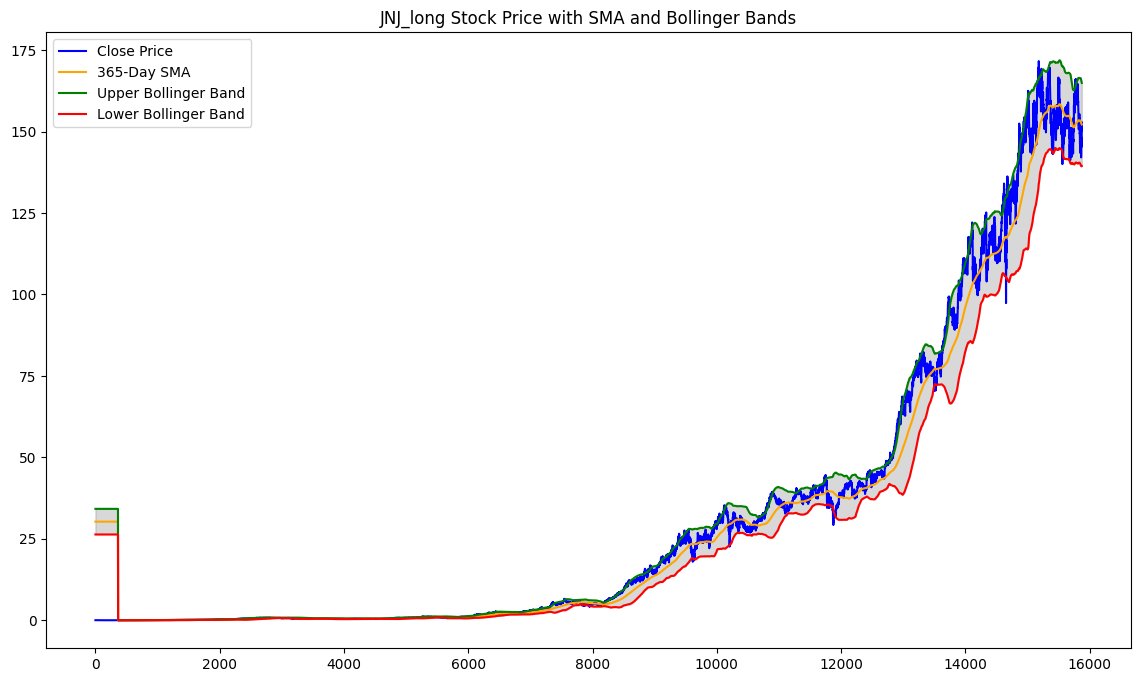

In [20]:
# Plot Close Price, SMA, and Bollinger Bands
plt.figure(figsize=(14, 8))
plt.plot(jnj_long_data['Close'], label='Close Price', color='blue')
plt.plot(jnj_long_data['SMA'], label=f'{window_sma}-Day SMA', color='orange')
plt.plot(jnj_long_data['UpperBand'], label='Upper Bollinger Band', color='green')
plt.plot(jnj_long_data['LowerBand'], label='Lower Bollinger Band', color='red')
plt.fill_between(jnj_long_data.index, jnj_long_data['UpperBand'], jnj_long_data['LowerBand'], color='gray', alpha=0.3)
plt.title('JNJ_long Stock Price with SMA and Bollinger Bands')
plt.legend()
plt.show()

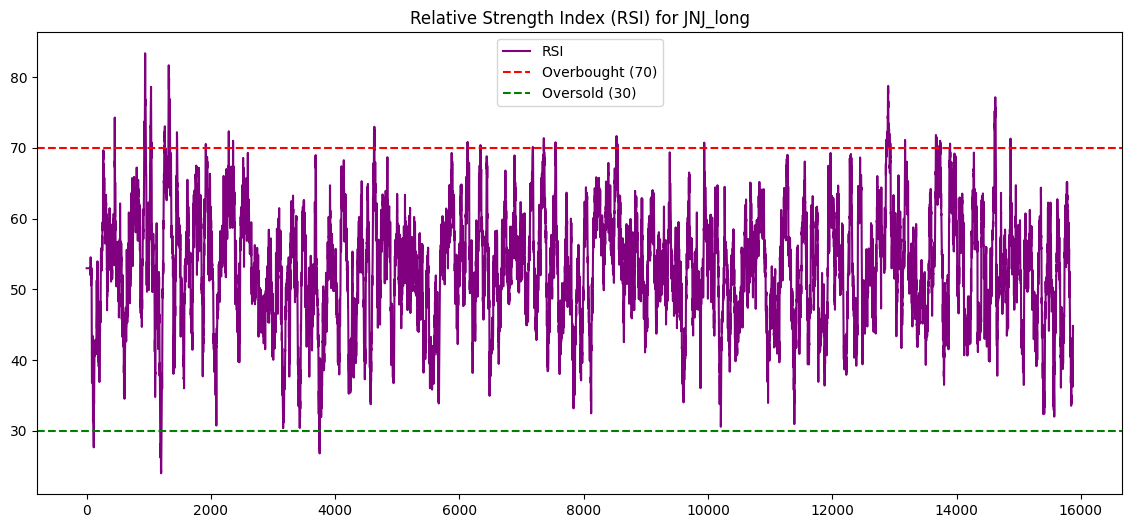

In [21]:
# Plot RSI
plt.figure(figsize=(14, 6))
plt.plot(jnj_long_data['RSI'], label='RSI', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (RSI) for JNJ_long')
plt.legend()
plt.show()

In [22]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


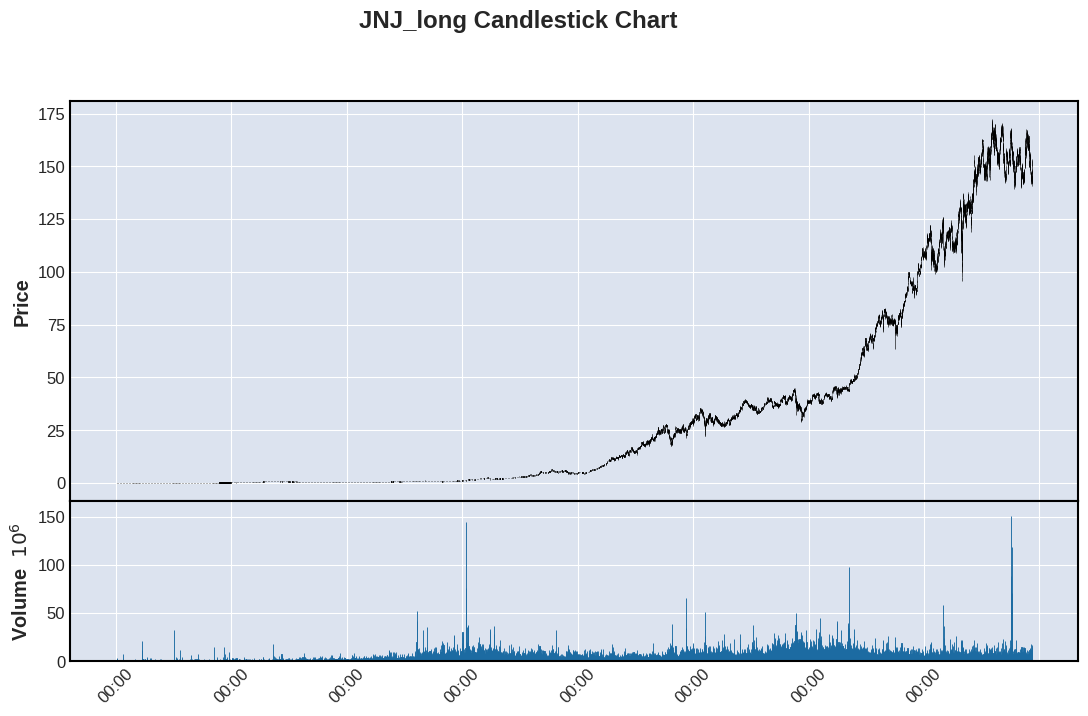

In [23]:
import mplfinance as mpf

# Ensure the index is a datetime object
jnj_long_data.index = pd.to_datetime(jnj_long_data.index)

# Plot candlestick chart
mpf.plot(jnj_long_data, type='candle', volume=True, figsize=(14, 8),
         title='JNJ_long Candlestick Chart')

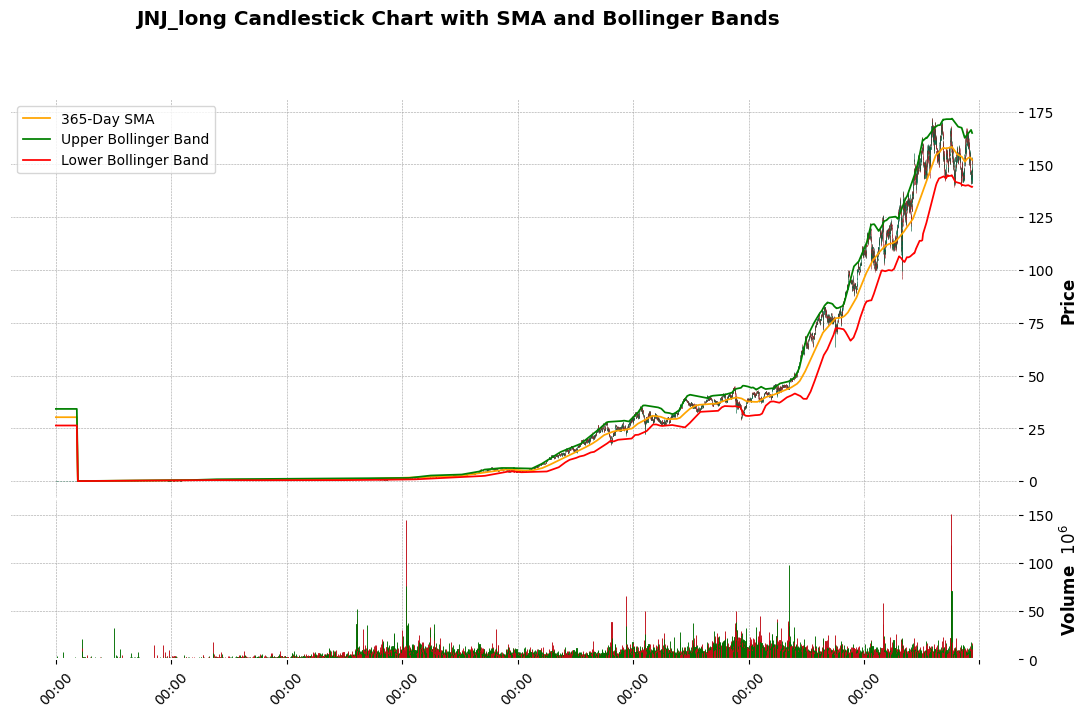

In [24]:
ap = [
    mpf.make_addplot(jnj_long_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(jnj_long_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(jnj_long_data['LowerBand'], color='red', label='Lower Bollinger Band')
]

# Plot candlestick chart with SMA and Bollinger Bands
mpf.plot(
    jnj_long_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 8),
    title='JNJ_long Candlestick Chart with SMA and Bollinger Bands',
    style='charles'  # You can change the style (e.g., 'classic', 'yahoo', 'charles')
)

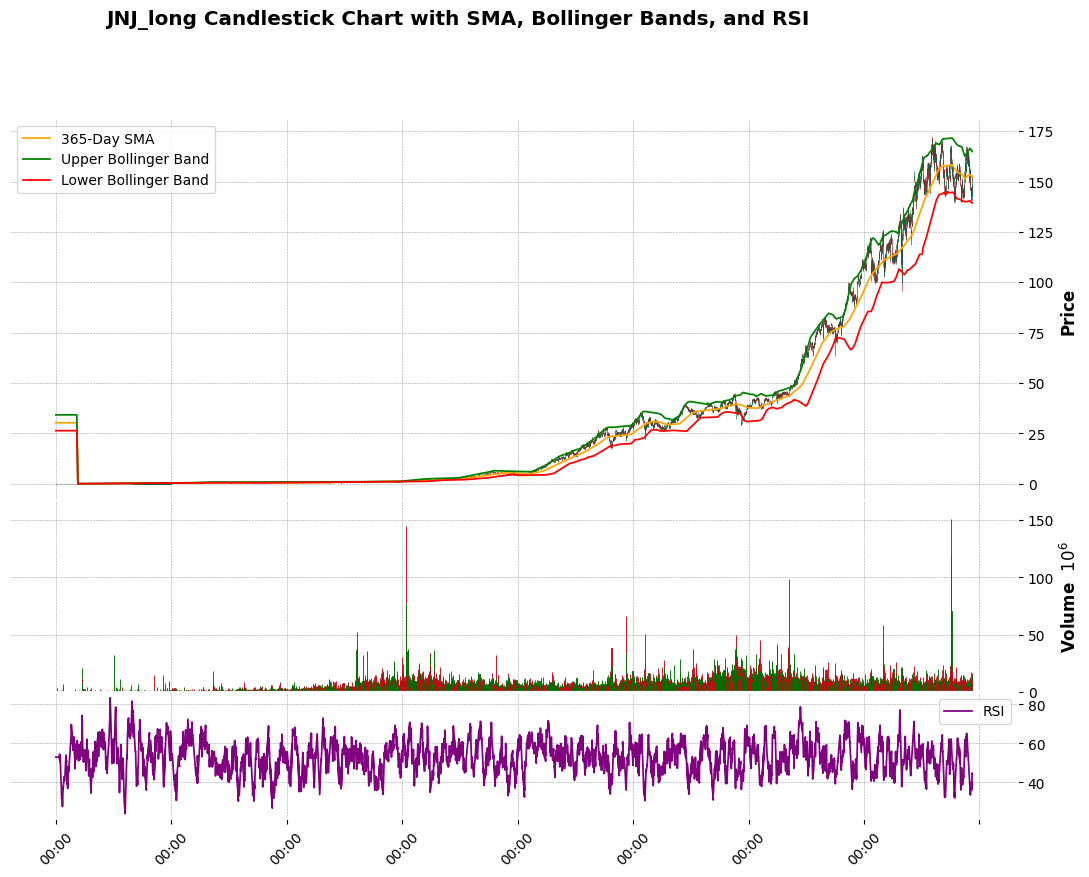

In [25]:
ap = [
    mpf.make_addplot(jnj_long_data['SMA'], color='orange', label=f'{window_sma}-Day SMA'),
    mpf.make_addplot(jnj_long_data['UpperBand'], color='green', label='Upper Bollinger Band'),
    mpf.make_addplot(jnj_long_data['LowerBand'], color='red', label='Lower Bollinger Band'),
    mpf.make_addplot(jnj_long_data['RSI'], panel=2, color='purple', label='RSI')  # RSI in a separate panel
]

# Plot candlestick chart with SMA, Bollinger Bands, and RSI
mpf.plot(
    jnj_long_data,
    type='candle',
    volume=True,
    addplot=ap,
    figsize=(14, 10),
    title='JNJ_long Candlestick Chart with SMA, Bollinger Bands, and RSI',
    style='charles',
    panel_ratios=(6, 3, 2)  # Adjust panel ratios for main chart, RSI, and volume
)

## Time Series Decomposition

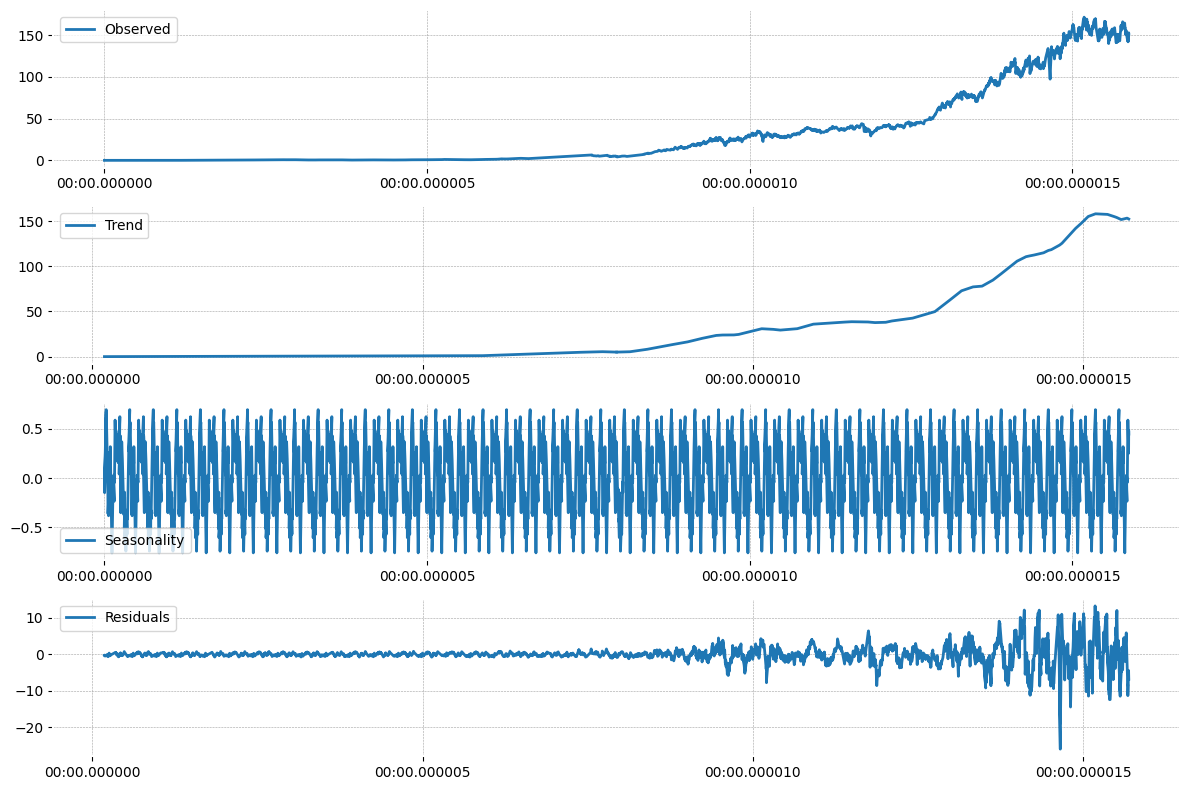

In [26]:
# Decompose the time series into trend, seasonality, and residual
decomposition = seasonal_decompose(jnj_long_data['Close'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## Daily Returns & Volatility

Historical Volatility (Standard Deviation of Daily Returns): 1.44%


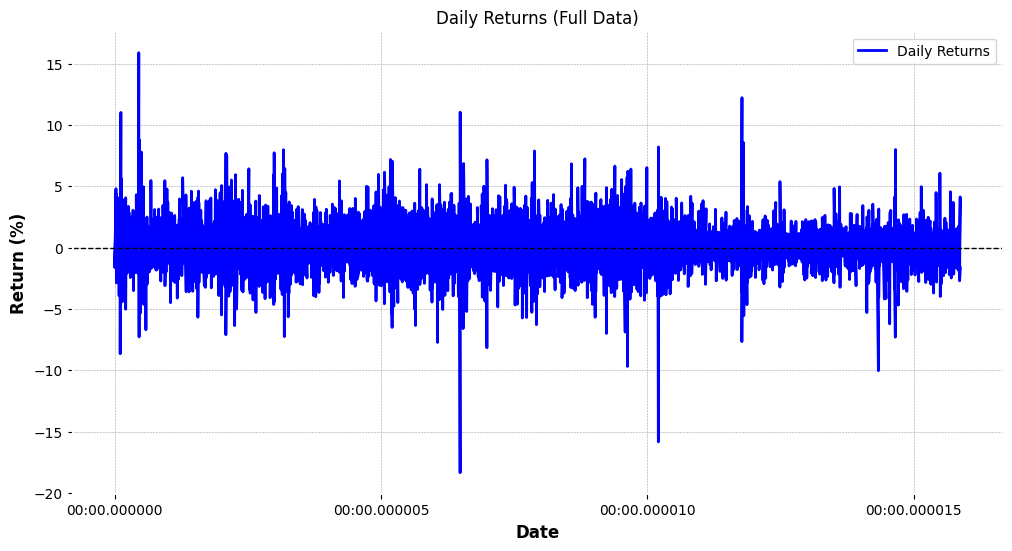

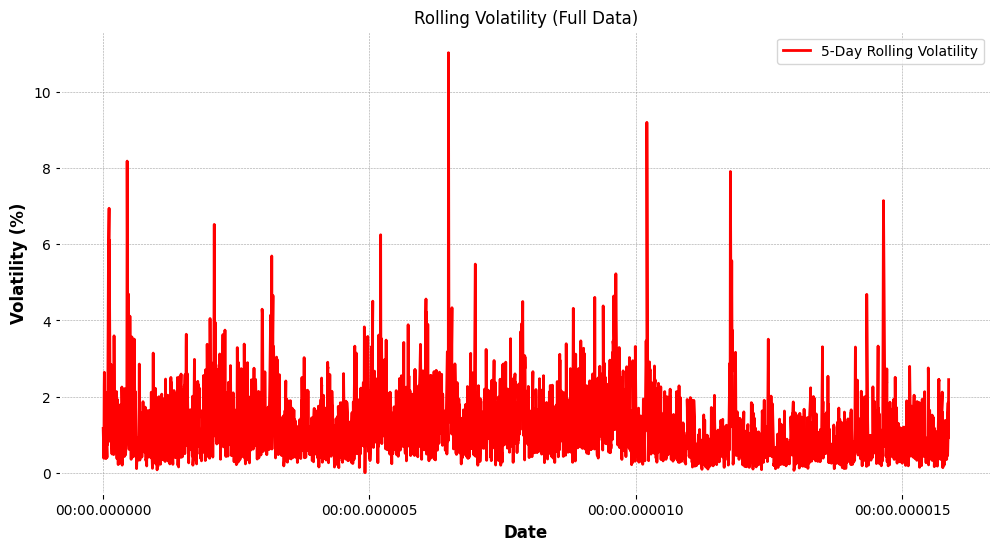

In [27]:
# Calculate daily returns
jnj_long_data['Daily_Return'] = jnj_long_data['Close'].pct_change() * 100  # Percentage change

# Calculate historical volatility (standard deviation of daily returns)
historical_volatility = jnj_long_data['Daily_Return'].std()

# Print historical volatility
print(f"Historical Volatility (Standard Deviation of Daily Returns): {historical_volatility:.2f}%")

# Plot daily returns
plt.figure(figsize=(12, 6))
plt.plot(jnj_long_data['Daily_Return'], label='Daily Returns', color='blue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Daily Returns (Full Data)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.show()

# Calculate rolling volatility (e.g., 5-day rolling standard deviation)
rolling_window = 5  # Adjust the window size as needed
jnj_long_data['Rolling_Volatility'] = jnj_long_data['Daily_Return'].rolling(window=rolling_window).std()

# Plot rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(jnj_long_data['Rolling_Volatility'], label=f'{rolling_window}-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility (Full Data)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.legend()
plt.show()

In [28]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(jnj_long_data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Interpret the result
if result[1] <= 0.05:
    print("The data is stationary (reject the null hypothesis).")
else:
    print("The data is non-stationary (fail to reject the null hypothesis).")

ADF Statistic: 1.8881034449830196
p-value: 0.998508637134317
Critical Values:
   1%: -3.4307631362921875
   5%: -2.861722589072687
   10%: -2.566867187634178
The data is non-stationary (fail to reject the null hypothesis).


In [29]:
# Apply differencing
jnj_long_data['Close_diff'] = jnj_long_data['Close'].diff().dropna()

In [30]:
jnj_long_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [31]:
# drop na
jnj_long_data.dropna(inplace=True)

In [32]:
jnj_long_data.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
SMA,0
StdDev,0
UpperBand,0
LowerBand,0


In [33]:
# Recheck stationarity using ADF test
result = adfuller(jnj_long_data['Close_diff'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] <= 0.05:
    print("The differenced data is stationary.")
else:
    print("The differenced data is still non-stationary.")

ADF Statistic: -21.688184998171955
p-value: 0.0
The differenced data is stationary.


<Figure size 1000x500 with 0 Axes>

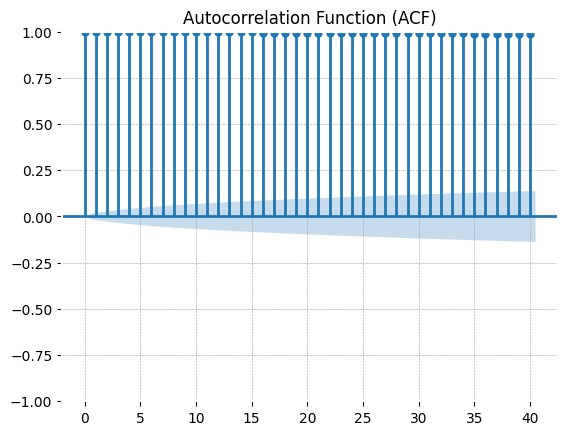

In [34]:
plt.figure(figsize=(10, 5))
plot_acf(jnj_long_data['Close'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

<Figure size 1000x500 with 0 Axes>

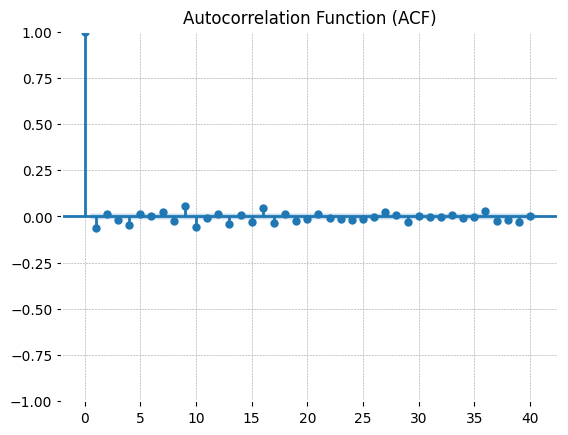

In [35]:
plt.figure(figsize=(10, 5))
plot_acf(jnj_long_data['Close_diff'], lags=40)
plt.title('Autocorrelation Function (ACF)')
plt.show()

In [36]:
jnj_long_data

,Date,Close,High,Low,Open,Volume,SMA,StdDev,UpperBand,LowerBand,RSI,Daily_Return,Rolling_Volatility,Close_diff
1970-01-01 00:00:00.000000005,1962-01-09,0.059603,0.059603,0.059603,0.000000,43200,30.299109,1.964170,34.227449,26.370769,52.978789,1.098923,1.166452,0.000648
1970-01-01 00:00:00.000000006,1962-01-10,0.060899,0.060899,0.060089,0.000000,172800,30.299109,1.964170,34.227449,26.370769,52.978789,2.174055,1.733445,0.001296
1970-01-01 00:00:00.000000007,1962-01-11,0.060575,0.060899,0.060575,0.000000,172800,30.299109,1.964170,34.227449,26.370769,52.978789,-0.532142,1.684372,-0.000324
1970-01-01 00:00:00.000000008,1962-01-12,0.059927,0.060899,0.059927,0.000000,259200,30.299109,1.964170,34.227449,26.370769,52.978789,-1.069504,1.580360,-0.000648
1970-01-01 00:00:00.000000009,1962-01-15,0.059927,0.060413,0.059927,0.000000,129600,30.299109,1.964170,34.227449,26.370769,52.978789,0.000000,1.304079,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000015870,2025-01-22,145.270004,145.470001,142.110001,144.000000,16834700,152.346646,6.504938,165.356522,139.336771,36.247424,-1.943969,1.443220,-2.879990
1970-01-01 00:00:00.000015871,2025-01-23,146.639999,147.910004,144.809998,145.440002,10506400,152.295724,6.476522,165.248768,139.342681,38.645638,0.943068,1.495488,1.369995
1970-01-01 00:00:00.000015872,2025-01-24,146.820007,147.630005,146.380005,146.809998,9887300,152.247650,6.451748,165.151145,139.344154,40.415694,0.122755,1.166010,0.180008
1970-01-01 00:00:00.000015873,2025-01-27,152.889999,153.449997,148.000000,148.449997,15152300,152.211811,6.411512,165.034835,139.388786,44.846395,4.134309,2.186750,6.069992


# LSTM Model

In [ ]:
# get the Date out of the index
jnj_long_data.reset_index(inplace=True)

In [ ]:
# isolet the Date and Sales columns
jnj_long_data = jnj_long_data[['Date', 'Close_diff']]

In [ ]:
jnj_long_data

,Date,Close_diff
0,1963-06-19,0.000165
1,1963-06-20,-0.000661
2,1963-06-21,0.000661
3,1963-06-24,-0.000661
4,1963-06-25,-0.000248
...,...,...
15501,2025-01-22,-2.879990
15502,2025-01-23,1.369995
15503,2025-01-24,0.180008
15504,2025-01-27,6.069992


In [ ]:
# Split into training and testing sets based on index
train_size = int(len(jnj_long_data) * 0.8)  # 80% for training
train_data = jnj_long_data[:train_size]
test_data = jnj_long_data[train_size:]

In [ ]:
# set the date coumn as index
train_data.set_index('Date', inplace=True)
test_data.set_index('Date', inplace=True)

In [ ]:
train_data

,Close_diff
Date,
1963-06-19,0.000165
1963-06-20,-0.000661
1963-06-21,0.000661
1963-06-24,-0.000661
1963-06-25,-0.000248
...,...
2012-09-19,0.035492
2012-09-20,0.213100
2012-09-21,0.113640


In [ ]:
test_data

,Close_diff
Date,
2012-09-26,-0.227295
2012-09-27,0.007118
2012-09-28,-0.071045
2012-10-01,0.156261
2012-10-02,-0.120750
...,...
2025-01-22,-2.879990
2025-01-23,1.369995
2025-01-24,0.180008


In [ ]:
# look at train data date range
train_data.index.min(), train_data.index.max()

(Timestamp('1963-06-19 00:00:00'), Timestamp('2012-09-25 00:00:00'))

In [ ]:
# look at the test data date range
test_data.index.min(), test_data.index.max()

(Timestamp('2012-09-26 00:00:00'), Timestamp('2025-01-28 00:00:00'))

In [ ]:
scaler = MinMaxScaler()

train_data.loc[:, 'x'] = scaler.fit_transform(train_data[['Close_diff']])
test_data.loc[:, 'x'] = scaler.transform(test_data[['Close_diff']])

In [ ]:
# Create sequences for the LSTM model
sequence_length = 100
train_sequences = []
test_sequences = []

for i in range(len(train_data) - sequence_length):
    train_sequences.append(train_data['x'].iloc[i:i+sequence_length].values)

for i in range(len(test_data) - sequence_length):
    test_sequences.append(test_data['x'].iloc[i:i+sequence_length].values)

train_sequences = np.array(train_sequences)
test_sequences = np.array(test_sequences)

In [ ]:
# Prepare train and test targets
train_targets = train_data['x'].iloc[sequence_length:].values
test_targets = test_data['x'].iloc[sequence_length:].values

In [ ]:
import time
start_time = time.time()

# Create and train an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_sequences.reshape(-1, sequence_length, 1), train_targets,
epochs=5, batch_size=32)

# Make predictions
test_predictions = model.predict(
                   test_sequences.reshape(-1, sequence_length, 1))

print(time.time() - start_time)

# Inverse transform the predictions to the original scale
test_predictions = scaler.inverse_transform(test_predictions).flatten()
test_targets = scaler.inverse_transform(test_targets.reshape(-1, 1))

Epoch 1/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - loss: 0.0593
Epoch 2/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - loss: 7.5242e-04
Epoch 3/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - loss: 7.5995e-04
Epoch 4/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - loss: 8.4824e-04
Epoch 5/5
385/385 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - loss: 7.7142e-04
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
106.82059621810913


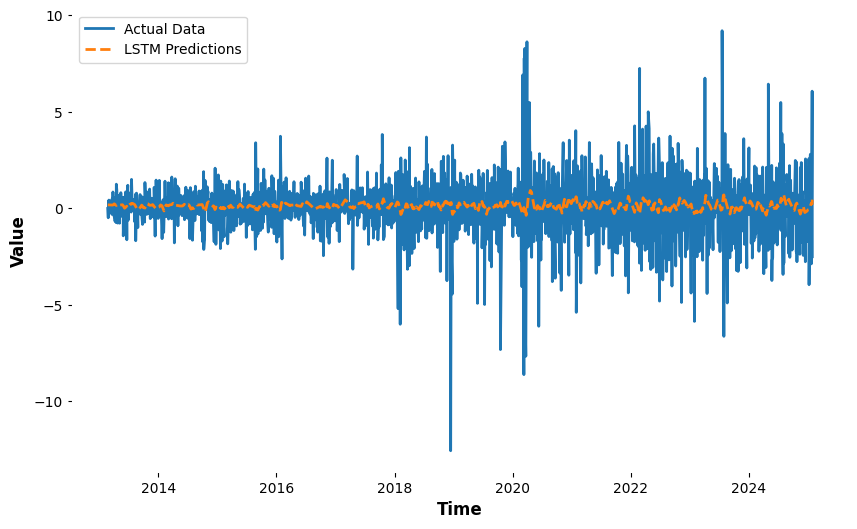

In [ ]:
# Plot the original data and LSTM predictions
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# measure of prediction accuracy
test_predictions_df = pd.DataFrame(test_predictions, columns = ["LSTM"])
test_targets_df = pd.DataFrame(test_targets, columns = ["actuals"])
predictions = pd.concat([test_predictions_df, test_targets_df], axis=1)

wape = (predictions['actuals'] - predictions['LSTM']).abs().sum() / predictions['actuals'].sum()

print(wape * 100)

2836.0065728333807


In [ ]:
# predict for the next one year
last_sequence = test_sequences[-1]
predicted_values = []

for _ in range(365):
    predicted_value = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predicted_values.append(predicted_value[0, 0])
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_value

predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1)).flatten()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

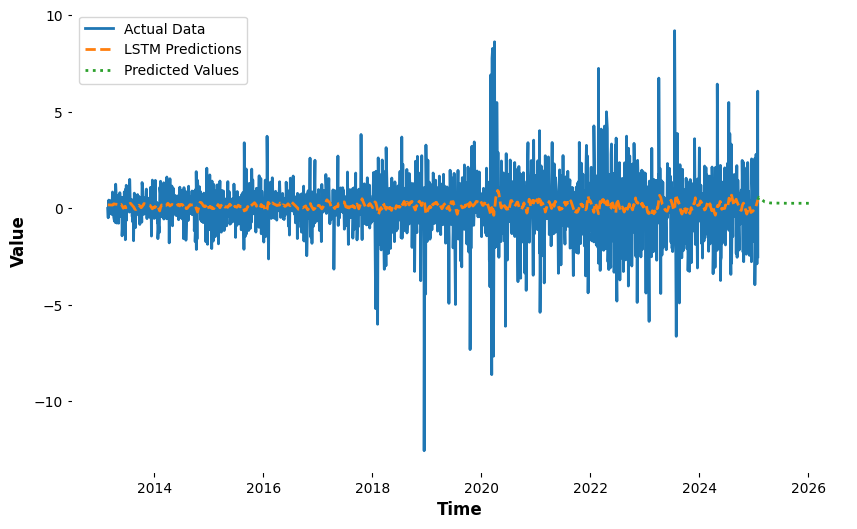

In [ ]:
# show in plot
plt.figure(figsize=(10, 6))
plt.plot(test_data.index[sequence_length:], test_targets,
label="Actual Data", linestyle='-')
plt.plot(test_data.index[sequence_length:], test_predictions,
label="LSTM Predictions", linestyle='--')

# Generate a date range for the predicted values
# Assuming your test_data has a daily frequency
from pandas.tseries.offsets import DateOffset
future_dates = pd.date_range(start=test_data.index[-1], periods=365 + 1, freq='D')[1:]  # Exclude the start date

# Now plot the predicted values against the future dates
plt.plot(future_dates, predicted_values,
         label="Predicted Values", linestyle=':')

plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.grid(False)
plt.show()